In [1]:
import math
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np

In [22]:
circle_centre: tuple[float, float] = (0.5, 0.5)
circle_radius: float = 0.5
precisions: list[int] = [100, 1000, 10000, 1000000, 100000000]

In [3]:
def scatter_sand_grains(number_of_grains: int) -> list[tuple[float, float]]:
    x_coordinates = np.random.rand(number_of_grains)
    y_coordinates = np.random.rand(number_of_grains)
    
    return list(zip(x_coordinates, y_coordinates))

In [4]:
def is_in_circle(grain: tuple[float, float]) -> bool:
    in_circle: bool = False
    x1: float = circle_centre[0]
    y1: float = circle_centre[1]
    x2: float = grain[0]
    y2: float = grain[1]
    if math.sqrt((x2 - x1)**2 + (y2 - y1)**2) <= circle_radius:
        in_circle = True
    
    return in_circle

def calculate_n_small(grains: list[tuple[float, float]]) -> int:
    n: int = 0
    for grain in grains:
        if is_in_circle(grain):
            n += 1
    
    return n

In [5]:
def calculate_pi_with(number_of_grains: int) -> float:
    grains: list[tuple[float, float]] = scatter_sand_grains(number_of_grains)
    n: int = calculate_n_small(grains)
    
    return 4 * n / number_of_grains

In [6]:
def calculate_pi() -> list[tuple[int, float]]:
    results: list[tuple[int, float]] = []
    for precision in precisions:
        results.append((precision, calculate_pi_with(precision)))
    
    return results

In [25]:
def see_results() -> None:
    pi_variants: list[tuple[int, float]] = calculate_pi()
    headers = ["N"] + [f"{n}" for n, _ in pi_variants]
    values = ["π"] + [f"{pi:.4f}" for _, pi in pi_variants]
    table_data = [headers, values]
    formatted_table = tabulate(table_data, tablefmt="grid")
    print(formatted_table)
    
    
    
    n_values, pi_values = zip(*pi_variants)
    log_n_values = np.log10(n_values)
    
    plt.plot(log_n_values, pi_values, marker='o', linestyle='-', color='b')
    plt.axhline(y=3.14159265359, color='r', linestyle='--', label='π = 3.14')
    plt.title('π vs. Log of Number of Grains')
    plt.xlabel('Log10(N)')
    plt.ylabel('π')
    plt.grid(True)
    plt.show()

+---+-------+----------+------------+--------+--------+
| N | 100   | 1000     | 10000      | 1e+06  | 1e+08  |
+---+-------+----------+------------+--------+--------+
| π |   3.4 |    3.244 |     3.1416 | 3.1404 | 3.1414 |
+---+-------+----------+------------+--------+--------+


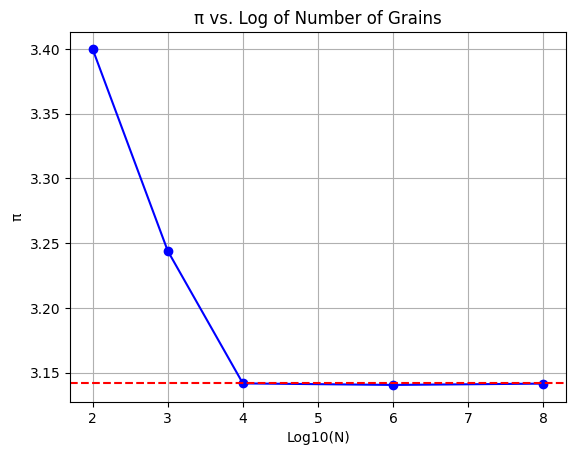

In [26]:
see_results()